# EDA 

Notebook to explore and crear EDA to the cars detail data

## Sección 1. Calidad de Datos CarroYA

In [3]:
import importlib
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from functions_data import * 
from definitions import *


#fd = importlib.reload(functions_data)

missing_columns_check = ['id','precio','km','año']

schema = {  'id':'string',
            'link':'string',
            'modelo':'category',
            'version':'string',
            'precio':'double',
            'ciudad':'category',
            'km':'double',
            'año':'int',
            'estado':'category',
            'ubicacion':'category',
            'placa':'category',
            'tipo_de_caja':'category',
            'combustible':'category',
            'cilindraje':'double',
            'color':'category',
            'puertas':'double',
            'airbags':'category',
            'direccion':'category',
}



csv_file = f'data/car_details.csv'
df = pd.read_csv(f'../{csv_file}')
df = clean_dataframe(df, schema, missing_columns_check)
# create new variables
df['marca'] = df['modelo'].apply(lambda x : str(x).split(' ')[0])
df['placa'] = df['placa'].apply(lambda x : str(x).split(' ')[0])

#Elegir solo carros usados
df = df.query('estado == "usado"')

# Corregir algunas valores de las variables categoricas
df['color'] = df['color'].str.replace('morado','otro').str.replace('lila','otro').str.replace('no disponible','otro').str.replace('varios','otro')
df['combustible'] = df['combustible'].str.replace('sin especificar','gasolina')
df['tipo_de_caja'] = df['tipo_de_caja'].str.replace('0','mecanica').str.replace('secuencial','automatica')
df['airbags'] = df['airbags'].str.replace('2','airbags').str.replace('airbags','1')
df['direccion'] = df['direccion'].str.replace('electro_hidraulica','electrica').str.replace('asistencia','').str.replace(' ','').str.replace('asistida','hidraulica')
df['cilindraje'] = df['cilindraje'].apply(lambda x: round(x *10) * 100 if x >= 0 and x<10 else x)
df['nombre_carro'] = df['modelo']
df['modelo'] = df['modelo'].apply(lambda x: ' '.join(x.split(' ')[1:]) if len(x.split(' ')) > 1 else x)
df['modelo'] = df['modelo'].str.replace('benz','')
df['impar'] = df['placa'].apply(lambda x: int(x[-1]) % 2 if x[-1].isdigit() else -1)


df.head()
#df.groupby(by=['airbags']).count()['id'].sort_values(ascending=False)#.head(10)

df original size: (7187, 19) - columns: Index(['id', 'link', 'modelo', 'version', 'precio', 'ciudad', 'km', 'año',
       'ESTADO', 'UBICACIÓN', 'PLACA', 'TIPO DE CAJA', 'COMBUSTIBLE',
       'CILINDRAJE', 'COLOR', 'PUERTAS', 'AIRBAGS', 'DIRECCIÓN',
       'Unnamed: 18'],
      dtype='object')
df cleaned size: (6928, 18) - columns: Index(['id', 'link', 'modelo', 'version', 'precio', 'ciudad', 'km', 'año',
       'estado', 'ubicacion', 'placa', 'tipo_de_caja', 'combustible',
       'cilindraje', 'color', 'puertas', 'airbags', 'direccion'],
      dtype='object')


,id,link,modelo,version,precio,ciudad,km,año,estado,ubicacion,...,tipo_de_caja,combustible,cilindraje,color,puertas,airbags,direccion,marca,nombre_carro,impar
0,8458b8fb-2f95-42b1-a5bc-d454803e5c12,https://www.carroya.com/detalle/usado/bmw/x2/2...,x2,sDrive 20i Premium,110000000.0,cajica,67000.0,2019,usado,cajica,...,automatica,gasolina,2000.0,negro,4.0,NaN,NaN,bmw,bmw x2,1
1,f502baa1-3537-448b-b391-80829644ff06,https://www.carroya.com/detalle/usado/volkswag...,jetta,NaN,53000000.0,bogota,115000.0,2019,usado,bogota,...,automatica,gasolina,1400.0,gris,NaN,NaN,NaN,volkswagen,volkswagen jetta,0
2,f674328c-d998-4a29-8bb0-8da5e00158bb,https://www.carroya.com/detalle/usado/nissan/q...,qashqai,2.0 Automatica Full Equipo,69500000.0,cali,66500.0,2016,usado,cali,...,automatica,gasolina,2000.0,negro,NaN,NaN,NaN,nissan,nissan qashqai,0
3,c9a0bf4d-09d6-4544-a705-28f50fe8107e,https://www.carroya.com/detalle/usado/renault/...,clio,1.4 Dynamique,17900000.0,cali,118000.0,2007,usado,cali,...,mecanica,gasolina,0.0,plateado,NaN,NaN,NaN,renault,renault clio,0
4,2281829,https://www.carroya.com/detalle/usado/chevrole...,onix,1.0 Turbo LT Sedan Automatico,59000000.0,bogota,39000.0,2021,usado,bogota,...,automatica,gasolina,1000.0,plateado,NaN,1,NaN,chevrolet,chevrolet onix,1


In [11]:
# Analisis de calidad de los datos con profiling

profile = ProfileReport(df, title="Profiling Report")
profile.to_file("../quality/quality_report.html")

Summarize dataset:  81%|████████▏ | 22/27 [00:02<00:00, 13.11it/s, Calculate auto correlation]    c:\Users\Msastoqu\OneDrive - Caracol Televisión S.A\Master\TFM\project\env\lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9 9 8 ... 9 9 8]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
c:\Users\Msastoqu\OneDrive - Caracol Televisión S.A\Master\TFM\project\env\lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include 

## Sección 1. Calidad Datos Mercadolibre

In [311]:

# Define function to clean and preprocess DataFrame
def clean_dataframe(df:pd.DataFrame, schema:dict, missing_columns_check:list) -> pd.DataFrame:
    print(f'df original size: {df.shape} - columns: {df.columns}' )
    # Standarize column names
    df = standarize_column_names(df)
    # Remove duplicates
    df = df.drop_duplicates()
    # Handle missing values
    df = df.dropna(subset=missing_columns_check)

    default_value_int = -1

    # Format fields to match the schema
    for column, dtype in schema.items():
        if column in df.columns:
            if dtype == 'date' and df[column].dtype != 'datetime64[ns]':
                df[column] = pd.to_datetime(df[column])
            elif dtype == 'int' and df[column].dtype != 'int64':
                df[column] = df[column].replace([np.inf, -np.inf, np.nan], default_value_int)
                df[column] = df[column].astype('int')
            elif dtype == 'double' and (df[column].dtype != 'float64' and df[column].dtype != 'int64'):
                df[column] = df[column].str.replace('$','').str.replace('.','').str.replace(',','').str.replace(' km','').str.replace(' ','').astype('float')
            elif dtype == 'string' and df[column].dtype != 'object':
                df[column] = df[column].astype('str')
            elif dtype == 'category':
                df[column] = df[column].str.lower().str.replace('(', '').str.replace(')', '')\
                    .str.replace('.','').str.replace('/','_').str.replace('-','_').str.replace('__','_')\
                    .str.replace('á','a').str.replace('é','e').str.replace('í','i').str.replace('ó','o').str.replace('ú','u').astype('string')
    print(f'df cleaned size: {df.shape} - columns: {df.columns}' )
    return df

def fix_motor_unit(x:str) -> float:
    x = str(x).lower().replace('cc','').replace('turbo','').replace('l','').replace('t','').replace('.','.')\
        .split(' ')[0].replace('x','').replace('-','').replace('cc','').replace('L','')
    try:
        x = float(x)
    except:
        x= -1
    if x >=800: 
        x = x/1000
    x = round(x,1)
    if x >= 6:
        x = -1
    return x

def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=df,palette="Set2")
    plt.title(f"{cols} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(df.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="Set2")
    plt.title(f"{cols} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def scatter_plot(cols, filter='none', value='duster'):
    """ Function to plot scatter plots for the given columns
    Args:
        cols (list): List of columns to plot
        filter (str): Filter to apply to the data 
            none: No filter
            modelo: Filter by modelo
            marca: Filter by marca
        value (str): Value to filter the data
    """
    num_cols = len(cols)
    num_rows = (num_cols - 1) // 3 + 1
    
    plt.figure(figsize=(15, 6 * num_rows))
    
    for i, col in enumerate(cols):
        plt.subplot(num_rows, 3, i+1)
        if filter == 'none':
            sns.scatterplot(x=col, y="price", data=df, color="blue")
        elif filter == 'modelo':
            sns.scatterplot(x=col, y="price", data=df[df['modelo'].str.contains(value)], color="blue")
        elif filter == 'marca':
            sns.scatterplot(x=col, y="price", data=df[df['marca'].str.contains(value)], color="blue")
        else:
            sns.scatterplot(x=col, y="price", data=df, color="blue")

        plt.title(f"{col} vs Price", fontweight="black", fontsize=20, pad=10)
        plt.tight_layout()


In [312]:
missing_columns_check = ['id_car','price','kilometros','año']

schema = {  'id_car':'string',
            'title':'string',
            'link':'string',
            'price':'double',
            'seller_name':'string',
            'city':'category',
            'color':'category',
            'aire_acondicionado':'category',
            'marca':'category',
            'puertas':'int',
            'motor':'string',
            'tipo_de_combustible':'category',
            'kilometros':'string',
            'modelo':'category',
            'transmision':'category',
            'version':'string',
            'año':'int',
            'cilindrada':'string',
            'capacidad_de_personas':'int',
            'potencia':'string',
            'control_de_traccion':'category',
            'unico_dueño':'category',
            'largo':'string',
            'linea':'string',
            'cilindros':'string',
}


json_file = f'data/car_attributes.json'
df = pd.read_json(f'../{json_file}')
# eliminar columnas innecesarias o con muchos nulos
df = df.drop(columns=['condition','category_id','catalog_product_id','domain_id','currency_id','seller_id','country','stop_time',\
                    'condicion_del_item','aceleracion_nafta','autonomia_con_nafta','consumo_promedio_nafta','modelo_detallado',\
                    'marca_fipe','modelo_fipe','año_fipe','velocidad_maxima_con_nafta', 'vehiculos_verificados','cilindros',\
                    'control_de_tracci��n','transmisi��n','versi��n','inspeccion_vehicular','linea','largo','unico_dueño'], errors='ignore')
print(list(df.columns))
print(f'=== df shape: {df.shape} === ')

df = clean_dataframe(df, schema, missing_columns_check)

# elimna datos de marcas menos populares
top_20_marcas = df['marca'].value_counts().head(20)
df = df.query(f'marca in {list(top_20_marcas.index)}')
print(f'=== df (top marcas) shape: {df.shape} === ')

# elimina datos con valores no permitidos de puertas
df['puertas'] = df['puertas'].apply(lambda x: int(x) if x >=2 and x <=5 else -1)
df = df.query('puertas != -1')
print(f'=== df (puertas) shape: {df.shape} === ')

# create new variables
year_today = 2024
df['age'] = df['año'].apply(lambda x :  year_today-int(x) )

# Corregir algunas valores de las variables categoricas
df['color'] = df['color'].str.split().str[0].str.replace('rosa','rojo').str.replace('beige','blanco').str.replace('celeste','azul')
df['color'] = df['color'].fillna("otro")
df['aire_acondicionado'] = df['aire_acondicionado'].fillna("no")
df['aire_acondicionado'] = df['aire_acondicionado'].apply(lambda x: 1 if x == 'si' else 0)
df['kilometros'] = df['kilometros'].str.replace('km','').str.replace(' ','').astype('float')
df['motor'] =  df['motor'].apply(lambda x:  fix_motor_unit(x))
df['cilindrada'] = df['cilindrada'].apply(lambda x:  fix_motor_unit(x))
df['potencia'] = df['potencia'].str.replace('hp','').str.replace(' ','').astype('float') # hp
df['transmision'] = df['transmision'].str.replace('manual','mecanica')
df['transmision'] = df['transmision'].fillna('mecanica')
df = df.query('motor != -1')
df = df.query('tipo_de_combustible !="n_a"')
print(f'=== df (motor) shape: {df.shape} === ')


['id_car', 'title', 'link', 'price', 'seller_name', 'city', 'color', 'aire_acondicionado', 'marca', 'puertas', 'motor', 'tipo_de_combustible', 'kilometros', 'modelo', 'version', 'año', 'cilindrada', 'capacidad_de_personas', 'potencia', 'control_de_traccion', 'transmision']
=== df shape: (43348, 21) === 
df original size: (43348, 21) - columns: Index(['id_car', 'title', 'link', 'price', 'seller_name', 'city', 'color',
       'aire_acondicionado', 'marca', 'puertas', 'motor',
       'tipo_de_combustible', 'kilometros', 'modelo', 'version', 'año',
       'cilindrada', 'capacidad_de_personas', 'potencia',
       'control_de_traccion', 'transmision'],
      dtype='object')
df cleaned size: (43343, 21) - columns: Index(['id_car', 'title', 'link', 'price', 'seller_name', 'city', 'color',
       'aire_acondicionado', 'marca', 'puertas', 'motor',
       'tipo_de_combustible', 'kilometros', 'modelo', 'version', 'año',
       'cilindrada', 'capacidad_de_personas', 'potencia',
       'control_de_t

In [313]:
# Procentaje de nulos
df.isna().sum()/df.shape[0] *100


id_car                    0.000000
title                     0.000000
link                      0.000000
price                     0.000000
seller_name               0.000000
city                      0.000000
color                     0.000000
aire_acondicionado        0.000000
marca                     0.000000
puertas                   0.000000
motor                     7.462353
tipo_de_combustible       0.000000
kilometros                0.000000
modelo                    0.000000
version                   0.004962
año                       0.000000
cilindrada               22.307673
capacidad_de_personas     0.000000
potencia                 21.670098
control_de_traccion       8.516708
transmision               0.000000
age                       0.000000
dtype: float64

In [198]:
# Analisis de calidad de los datos con profiling

profile = ProfileReport(df, title="Profiling Report")
profile.to_file("../quality/quality_report.html")

Summarize dataset:  83%|████████▎ | 24/29 [00:01<00:00, 15.18it/s, Calculate auto correlation]             c:\Users\Msastoqu\OneDrive - Caracol Televisión S.A\Master\TFM\project\env\lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[6 0 6 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
c:\Users\Msastoqu\OneDrive - Caracol Televisión S.A\Master\TFM\project\env\lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues


## Sección 2.  Análisis Exploratorio

In [314]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pylab
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)
from scipy.stats import shapiro
from scipy.stats import kstest

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [315]:
# Información general del dataset
print(f'=== df shape: {df.shape} === ')
df.info()

=== df shape: (40309, 22) === 
<class 'pandas.core.frame.DataFrame'>
Index: 40309 entries, 0 to 43347
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_car                 40309 non-null  object 
 1   title                  40309 non-null  object 
 2   link                   40309 non-null  object 
 3   price                  40309 non-null  int64  
 4   seller_name            40309 non-null  object 
 5   city                   40309 non-null  string 
 6   color                  40309 non-null  object 
 7   aire_acondicionado     40309 non-null  int64  
 8   marca                  40309 non-null  string 
 9   puertas                40309 non-null  int64  
 10  motor                  37301 non-null  float64
 11  tipo_de_combustible    40309 non-null  string 
 12  kilometros             40309 non-null  float64
 13  modelo                 40309 non-null  string 
 14  version                40307

Comentario:
- Se tiene 40.309 registros de vehículos desde el 2010 hasta el 2024, de 20 marcas, todos carros usados
- se cuentan con 6 variables categorias, 9 númericas y 7 tipo string de las cuales posiblemente solo se utilice el ID

In [204]:
df.describe()

,price,puertas,motor,kilometros,año,cilindrada,capacidad_de_personas,potencia,age
count,4.030900e+04,40309.000000,37301.000000,4.030900e+04,40309.000000,31317.000000,40309.000000,31574.000000,40309.000000
mean,9.021937e+07,4.566921,2.057331,7.118262e+04,2017.454688,2.047521,3.402615,158.488091,6.545312
std,7.545694e+07,0.749230,0.734461,6.004690e+04,3.792782,0.720122,2.558606,68.700887,3.792782
min,1.800000e+06,2.000000,0.000000,1.000000e+00,2010.000000,-1.000000,-1.000000,10.000000,0.000000
25%,4.400000e+07,4.000000,1.600000,3.399600e+04,2014.000000,1.600000,2.000000,109.000000,3.000000
50%,6.800000e+07,5.000000,2.000000,6.400000e+04,2018.000000,2.000000,5.000000,148.000000,6.000000
75%,1.100000e+08,5.000000,2.400000,9.800000e+04,2021.000000,2.400000,5.000000,184.000000,10.000000
max,2.480000e+09,5.000000,5.700000,6.350000e+06,2024.000000,5.700000,8.000000,585.000000,14.000000


teniendo en cuenta la calidad de la información presente se realizan los sigueintes hallazgos:
- se encuentran valores atipicos en la variable price, kilometros. 
- Entre motor y cilindrada, motor tiene un mejor nivel de calidad. que ronda sobre el 9% de datos nulos
- la variable modelo y versión tienen una alta cardinalidad, queire decir que no sirven como variable categorica dentro del modelo
- Aire acondicionado se puede volver booleana
- La variable categoria Tipo de combustible esta muy desbalanceada hacia la categoria gasolina
- la variable capacidad e personas tiene un 24% de valores negativos (corrección de nulos) es posible que no se utilice

In [248]:
df.columns

Index(['id_car', 'title', 'link', 'price', 'seller_name', 'city', 'color',
       'aire_acondicionado', 'marca', 'puertas', 'motor',
       'tipo_de_combustible', 'kilometros', 'modelo', 'version', 'año',
       'cilindrada', 'capacidad_de_personas', 'potencia',
       'control_de_traccion', 'transmision', 'age'],
      dtype='object')

In [316]:
df = df.drop(columns=['seller_name','año','cilindrada','capacidad_de_personas'], errors='ignore')
print(f'=== df shape: {df.shape} === ')
print(list(df.columns))



=== df shape: (40309, 18) === 
['id_car', 'title', 'link', 'price', 'city', 'color', 'aire_acondicionado', 'marca', 'puertas', 'motor', 'tipo_de_combustible', 'kilometros', 'modelo', 'version', 'potencia', 'control_de_traccion', 'transmision', 'age']


### Precio

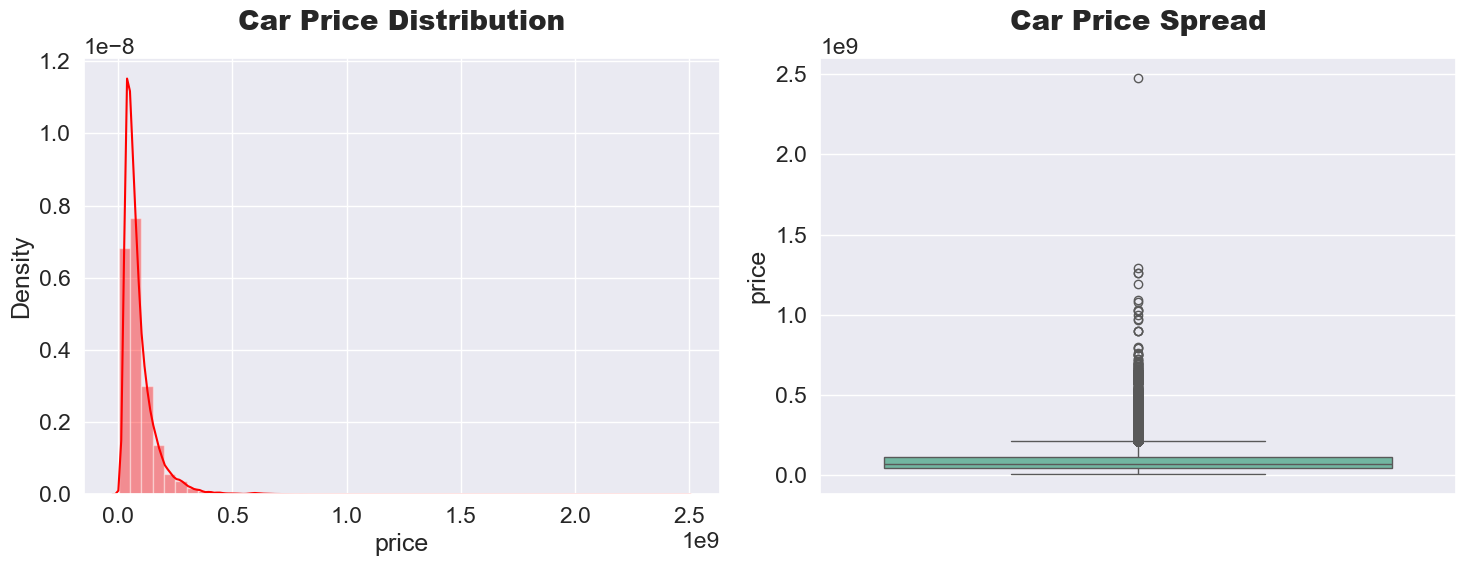

In [267]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df["price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

In [266]:
df["price"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
price,1800000.0,9.021937e+07,68000000.0,2.480000e+09,7.545694e+07,4.12305


Se observan grandes valores atípicos, pro la gran diferencia entre la media y la mediana, así como que la curva esta inclinada hacia la izqueirda (precios más bajos, skew+)

In [302]:
# Validemos si los datos de precio cumplen con la distribución normal
# Realizar la prueba de Shapiro-Wilk
stat, p = shapiro(df['price'])
print('Shapiro --> Statistics=%.3f, p=%.3f' % (stat, p))
# Interpretar el resultado
alpha = 0.05
if p > alpha:
    print('\tMuestra se parece a una curva gausiana (No se rechaza H0)')
else:
    print('\tMuestra no luce como una curva gausiana (se rechaza H0)')

# Realizar la prueba de Kolmogorov-Smirnov
stat, p = kstest(df['price'], 'norm')
print('Kolmogorov -->Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretar el resultado
if p > alpha:
    print('\tMuestra se parece a una curva gausiana (No se rechaza H0)')
else:
    print('\tMuestra no luce como una curva gausiana (se rechaza H0)')

Shapiro --> Statistics=0.904, p=0.000
	Muestra no luce como una curva gausiana (se rechaza H0)
Kolmogorov -->Statistics=1.000, p=0.000
	Muestra no luce como una curva gausiana (se rechaza H0)


Ambas pruebas demuestran que los datos no son estan bajo la curva de normalidad, por lo que se decide implementar un método de quitar valores atípicos medaite IQR

In [317]:
# Calcular los cuartiles y el rango intercuartílico (IQR)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
# Definir los límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"=== IQR: {IQR} - Lower Bound: {lower_bound} - Upper Bound: {upper_bound} ===")
# Filtrar los valores atípicos
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print(f"=== Filtered DataFrame (sin valores atípicos de Precio): {df_filtered.shape} ===")

=== IQR: 66000000.0 - Lower Bound: -55000000.0 - Upper Bound: 209000000.0 ===
=== Filtered DataFrame (sin valores atípicos de Precio): (37770, 18) ===


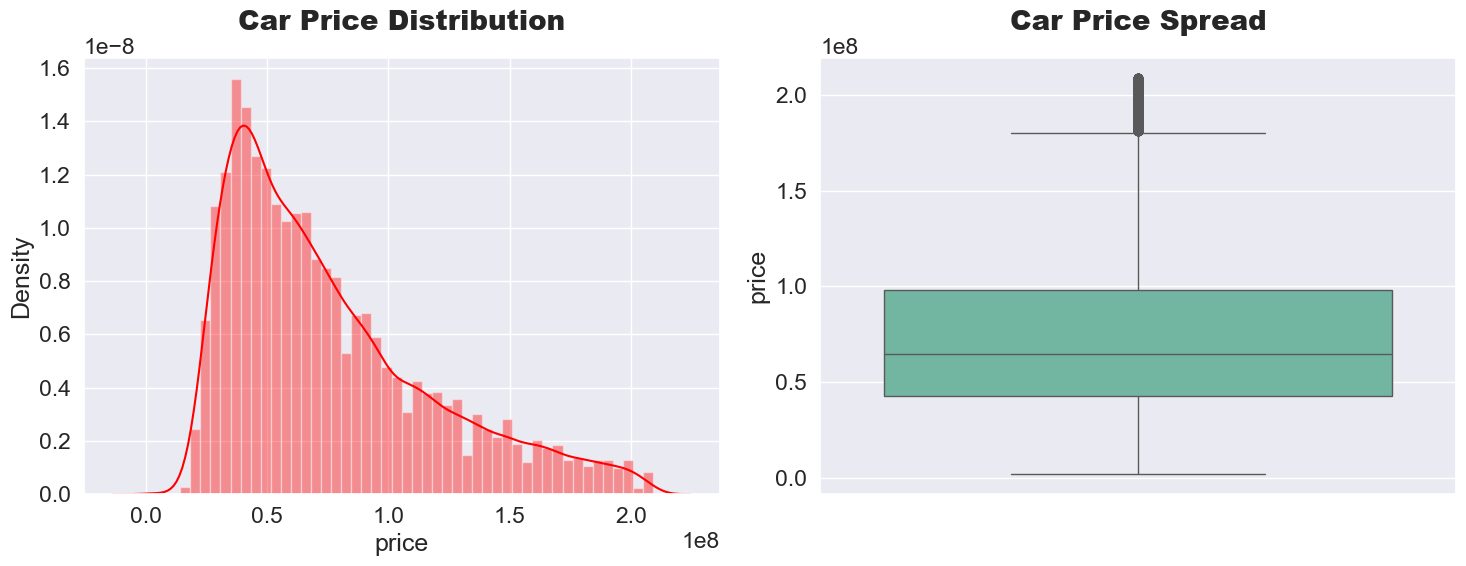

In [270]:
# Visualizar la distribución de los precios con el ajuste
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df_filtered["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df_filtered["price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

### Kilometros recorridos

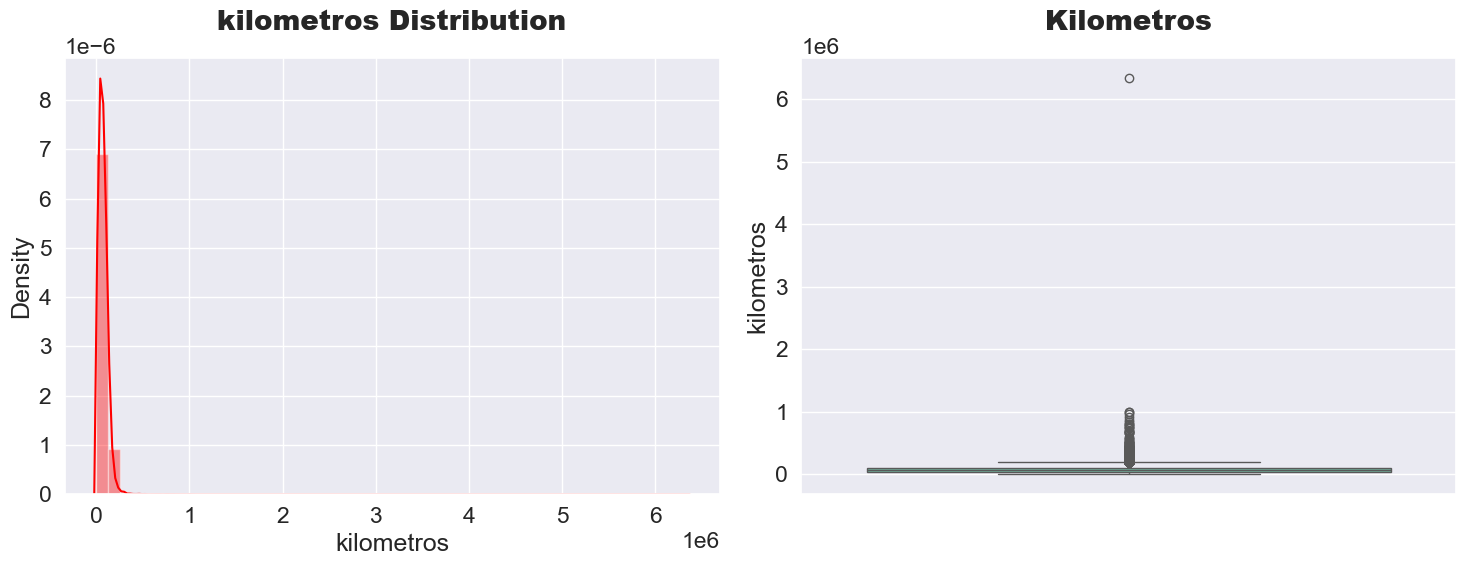

In [271]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df_filtered["kilometros"],color="red",kde=True)
plt.title("kilometros Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df_filtered["kilometros"],palette="Set2")
plt.title("Kilometros",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

tiene un comportamiento muy parecido al precio, por tal motivo se utilizará la misma técnica del rango intercuartil para eliminar los atípicos

In [318]:
# Calcular los cuartiles y el rango intercuartílico (IQR)
Q1 = df_filtered['kilometros'].quantile(0.25)
Q3 = df_filtered['kilometros'].quantile(0.75)
IQR = Q3 - Q1
# Definir los límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"=== IQR: {IQR} - Lower Bound: {lower_bound} - Upper Bound: {upper_bound} ===")
# Filtrar los valores atípicos
df_filtered = df_filtered[(df_filtered['kilometros'] >= lower_bound) & (df_filtered['kilometros'] <= upper_bound)]
print(f"=== Filtered DataFrame (sin valores atípicos de KM): {df_filtered.shape} ===")

=== IQR: 63000.0 - Lower Bound: -57500.0 - Upper Bound: 194500.0 ===
=== Filtered DataFrame (sin valores atípicos de KM): (37105, 18) ===


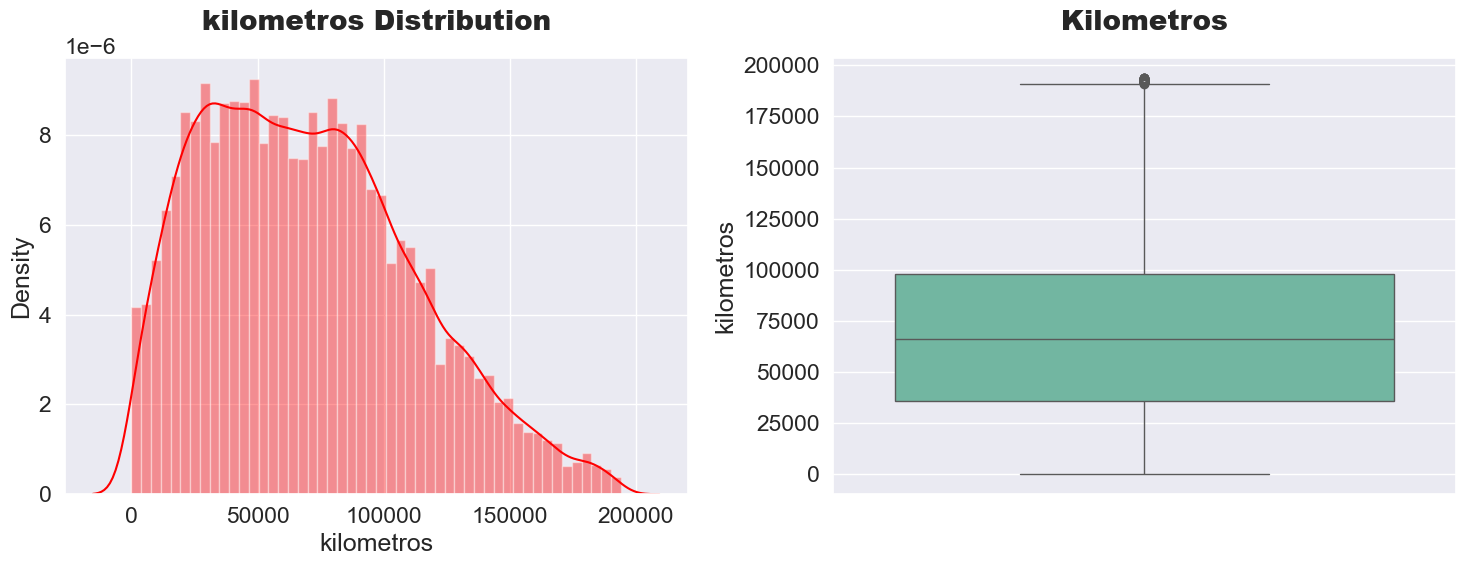

In [319]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df_filtered["kilometros"],color="red",kde=True)
plt.title("kilometros Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df_filtered["kilometros"],palette="Set2")
plt.title("Kilometros",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

In [320]:
df = df_filtered.copy()
print(f'=== df shape: {df.shape} === {list(df.columns)}')

=== df shape: (37105, 18) === ['id_car', 'title', 'link', 'price', 'city', 'color', 'aire_acondicionado', 'marca', 'puertas', 'motor', 'tipo_de_combustible', 'kilometros', 'modelo', 'version', 'potencia', 'control_de_traccion', 'transmision', 'age']


### Marcas

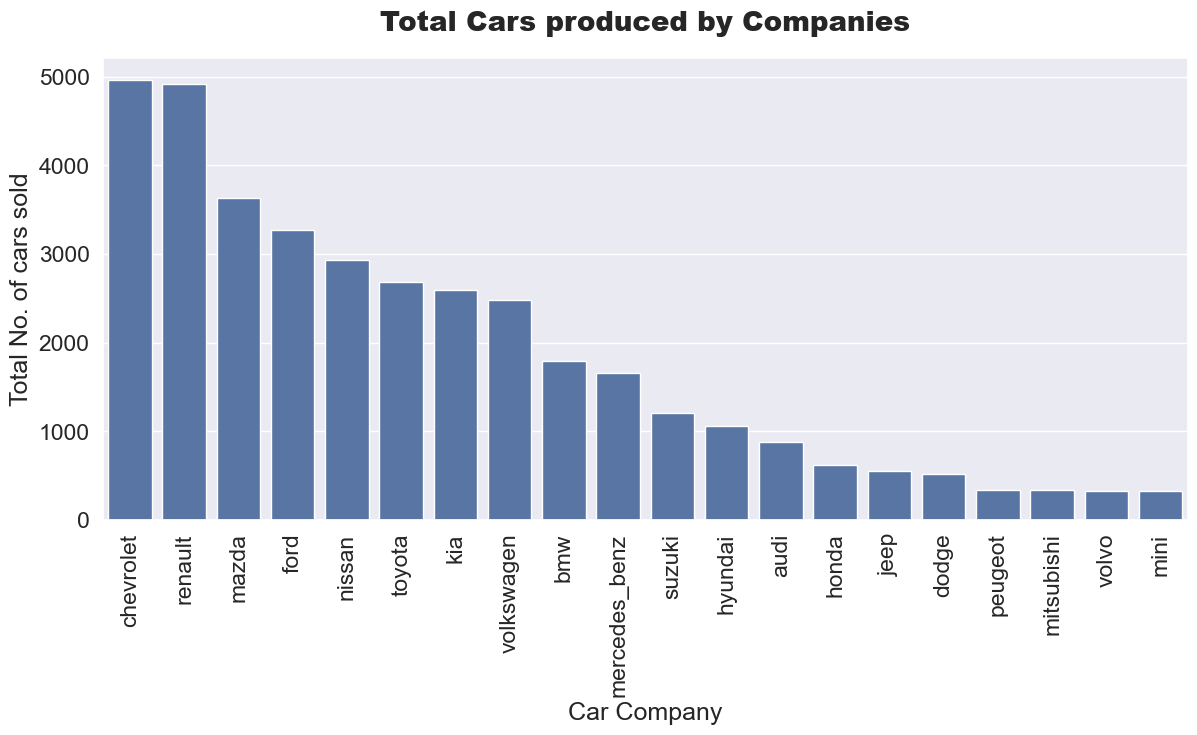

In [277]:
plt.figure(figsize=(14,6))
counts = df["marca"].astype(str).value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars sold")
plt.title("Total Cars produced by Companies", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

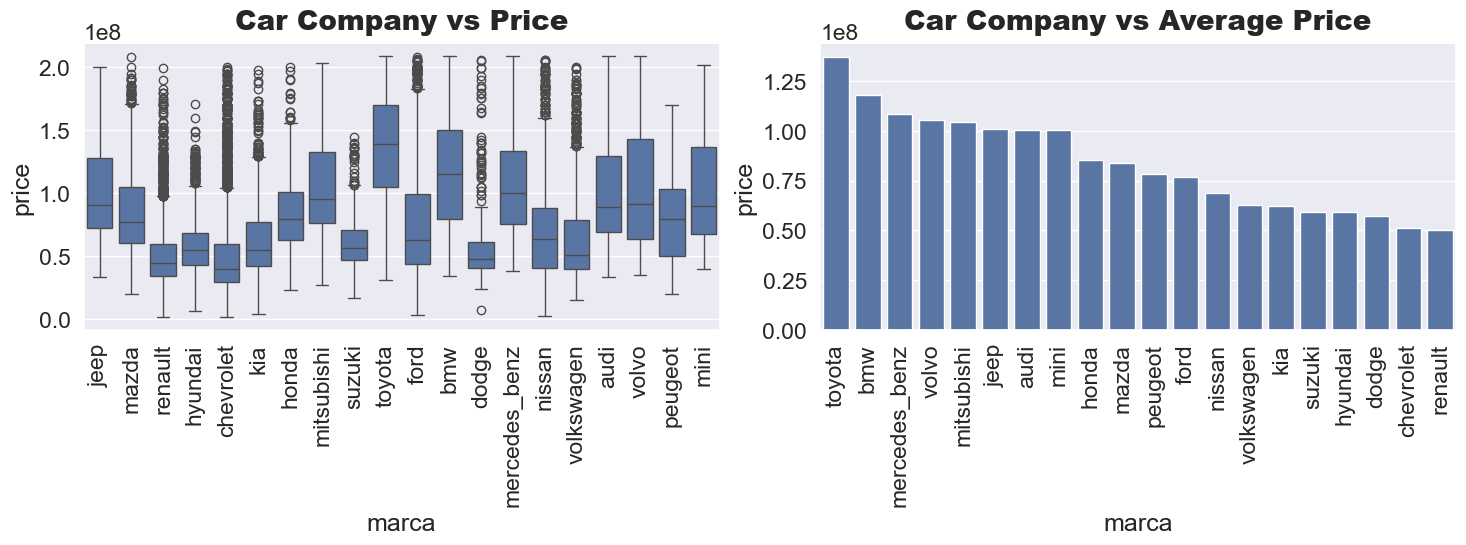

In [278]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x="marca",y="price",data=df)
plt.xticks(rotation=90)
plt.title("Car Company vs Price", pad=10, fontweight="black", fontsize=20)

plt.subplot(1,2,2)
x = pd.DataFrame(df.groupby("marca")["price"].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y="price",data=x) 
plt.xticks(rotation=90)
plt.title("Car Company vs Average Price", pad=10, fontweight="black", fontsize=20)
plt.tight_layout()
plt.show()

Se identifican algunas marcas que tienen un costo promedio mas alto como toyota, bmw, mercedez menz, y por el contrario las marcas más economicas, de hecho estan directamente relacionadas con la cantidad de ventas ( renault y chevrolet)

In [260]:
df.columns

Index(['id_car', 'title', 'link', 'price', 'city', 'color',
       'aire_acondicionado', 'marca', 'puertas', 'motor',
       'tipo_de_combustible', 'kilometros', 'modelo', 'version', 'potencia',
       'control_de_traccion', 'transmision', 'age'],
      dtype='object')

### Tipo de Combustible

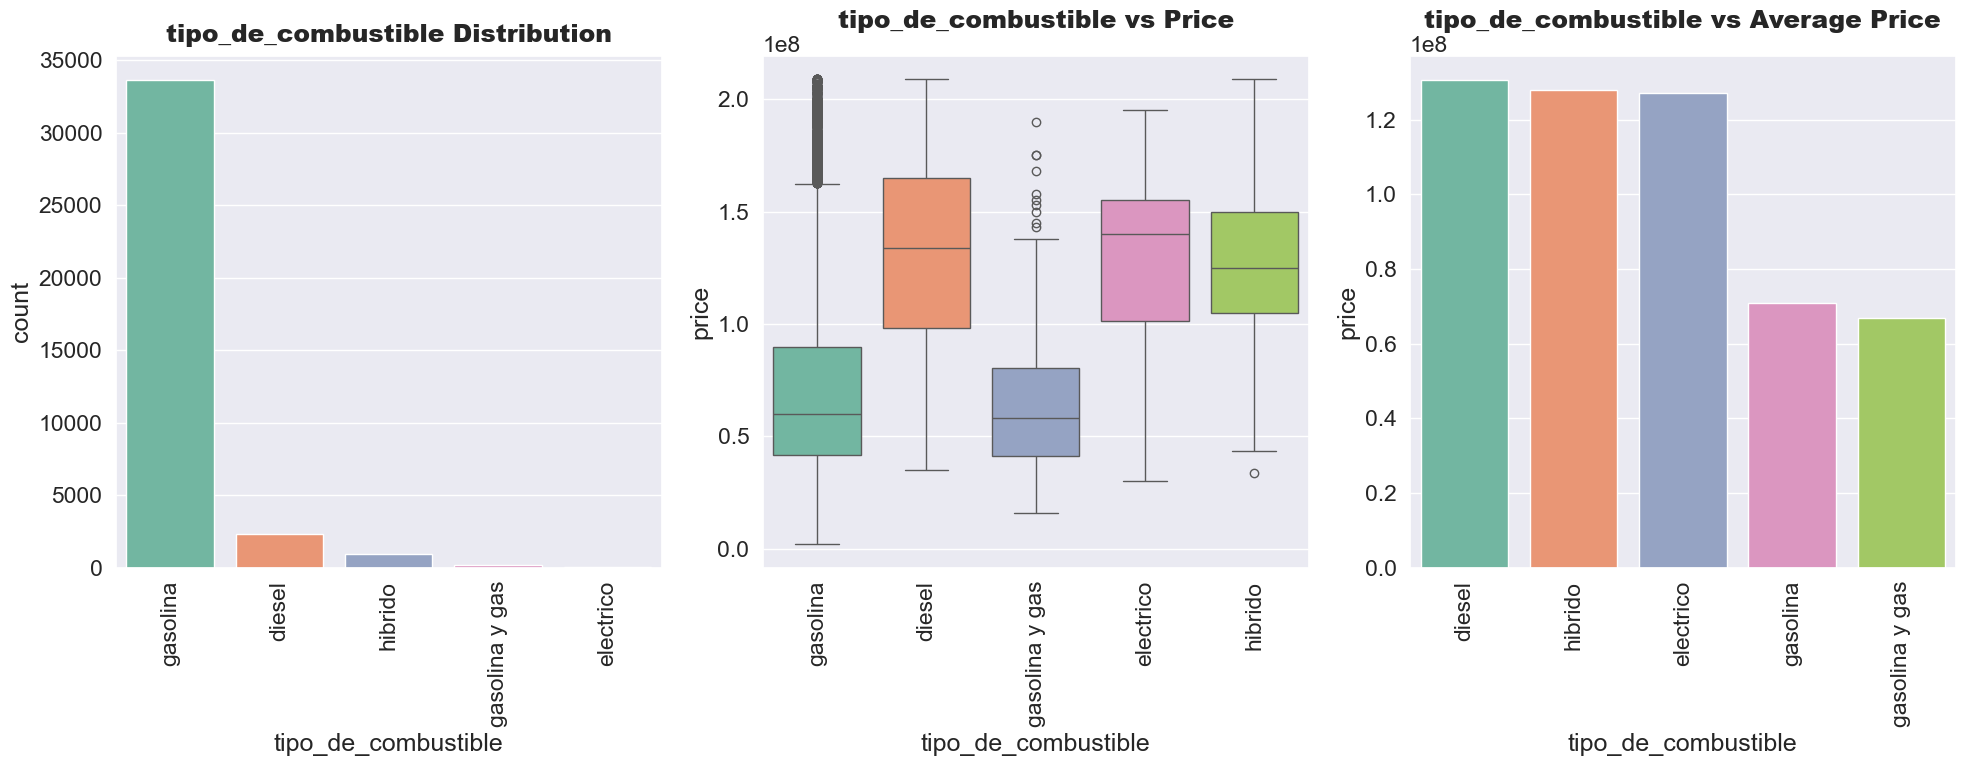

In [279]:
categorical_visualization("tipo_de_combustible")

Se observa como los vehículos de gasolina y de casolina y gass tienden a ser mucho mas económicos que las otras categorias. los vehiculos dissel, electricos e híbridos se posicionan como los de alta gama.

### Control de Tracción

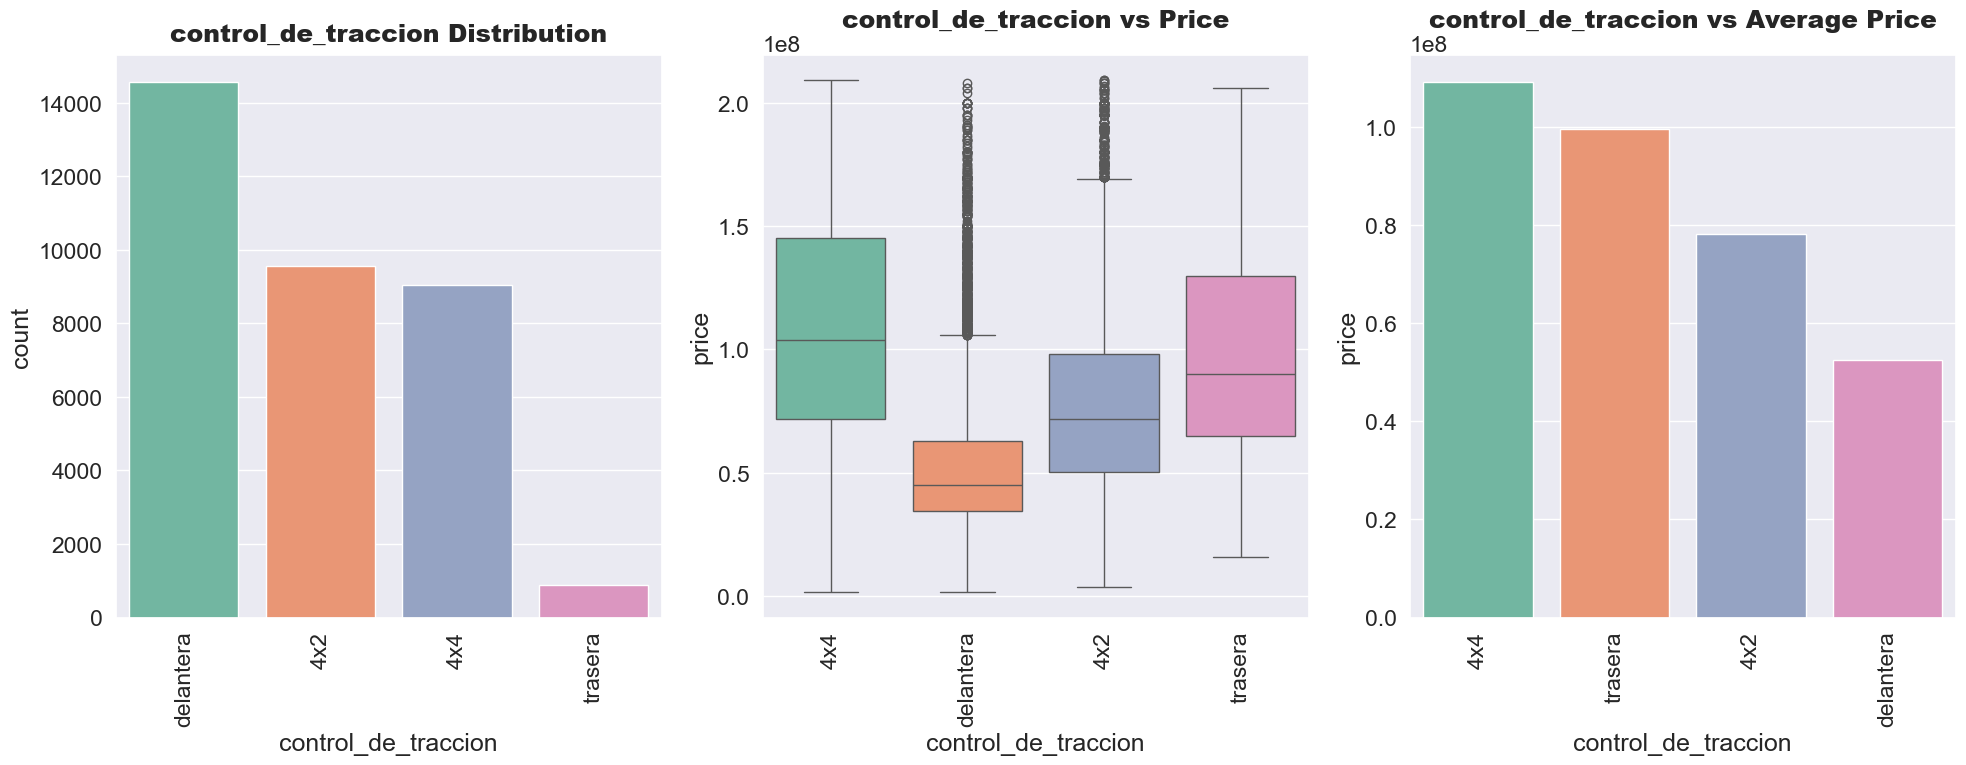

In [281]:
categorical_visualization("control_de_traccion")

### Aire Acondicionado

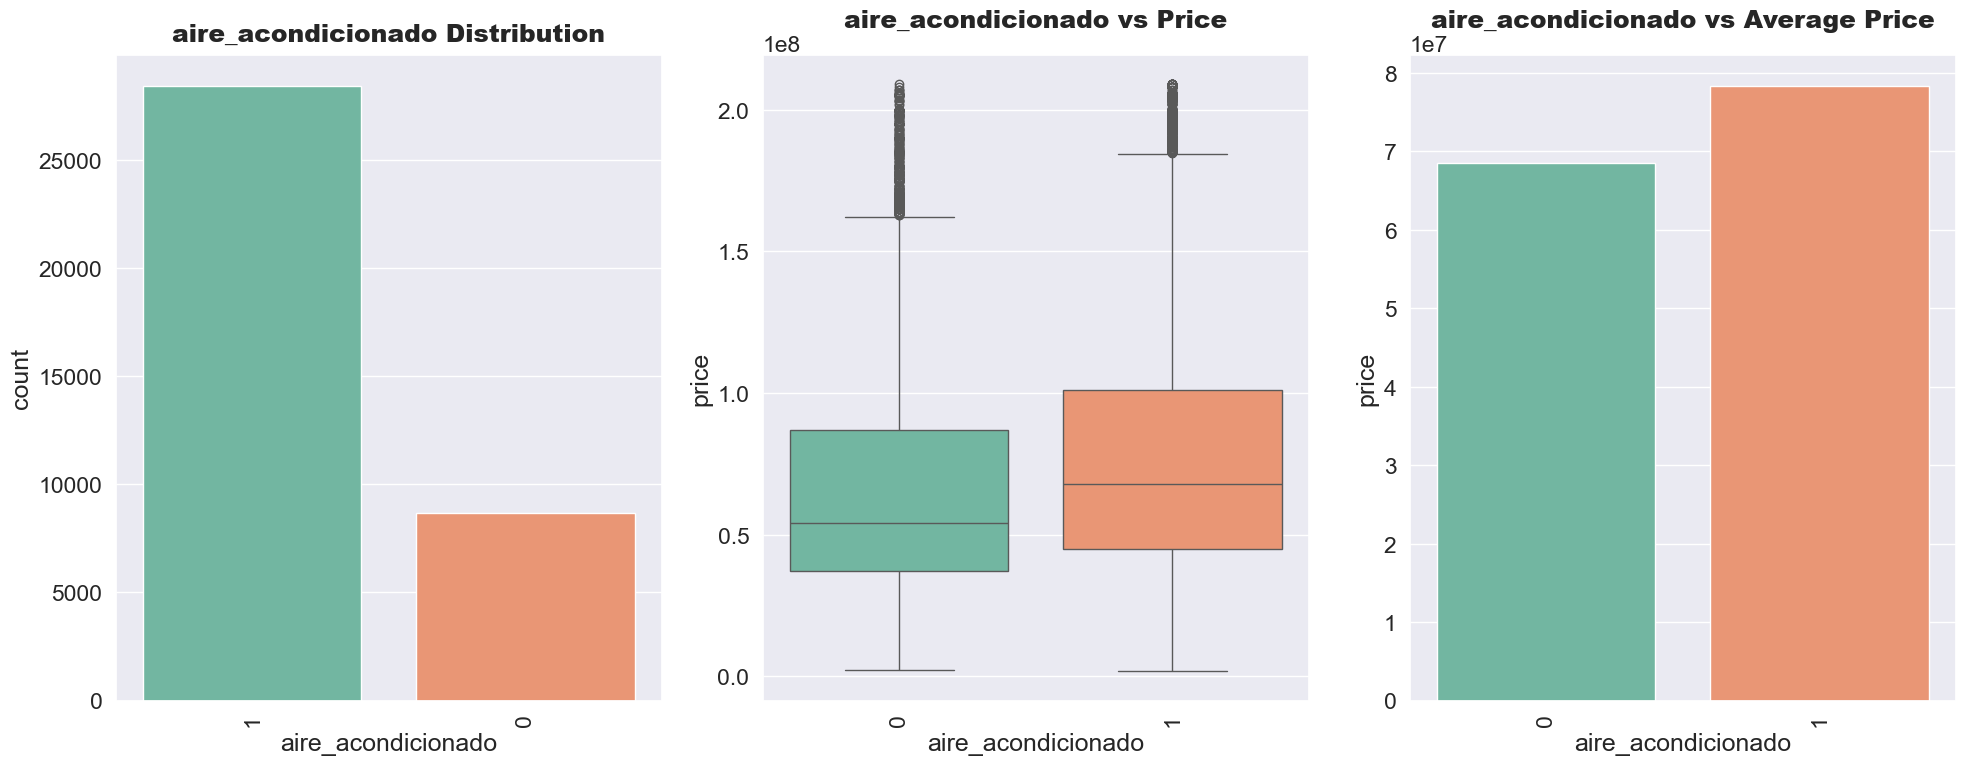

In [282]:
categorical_visualization("aire_acondicionado")

### Transmisión

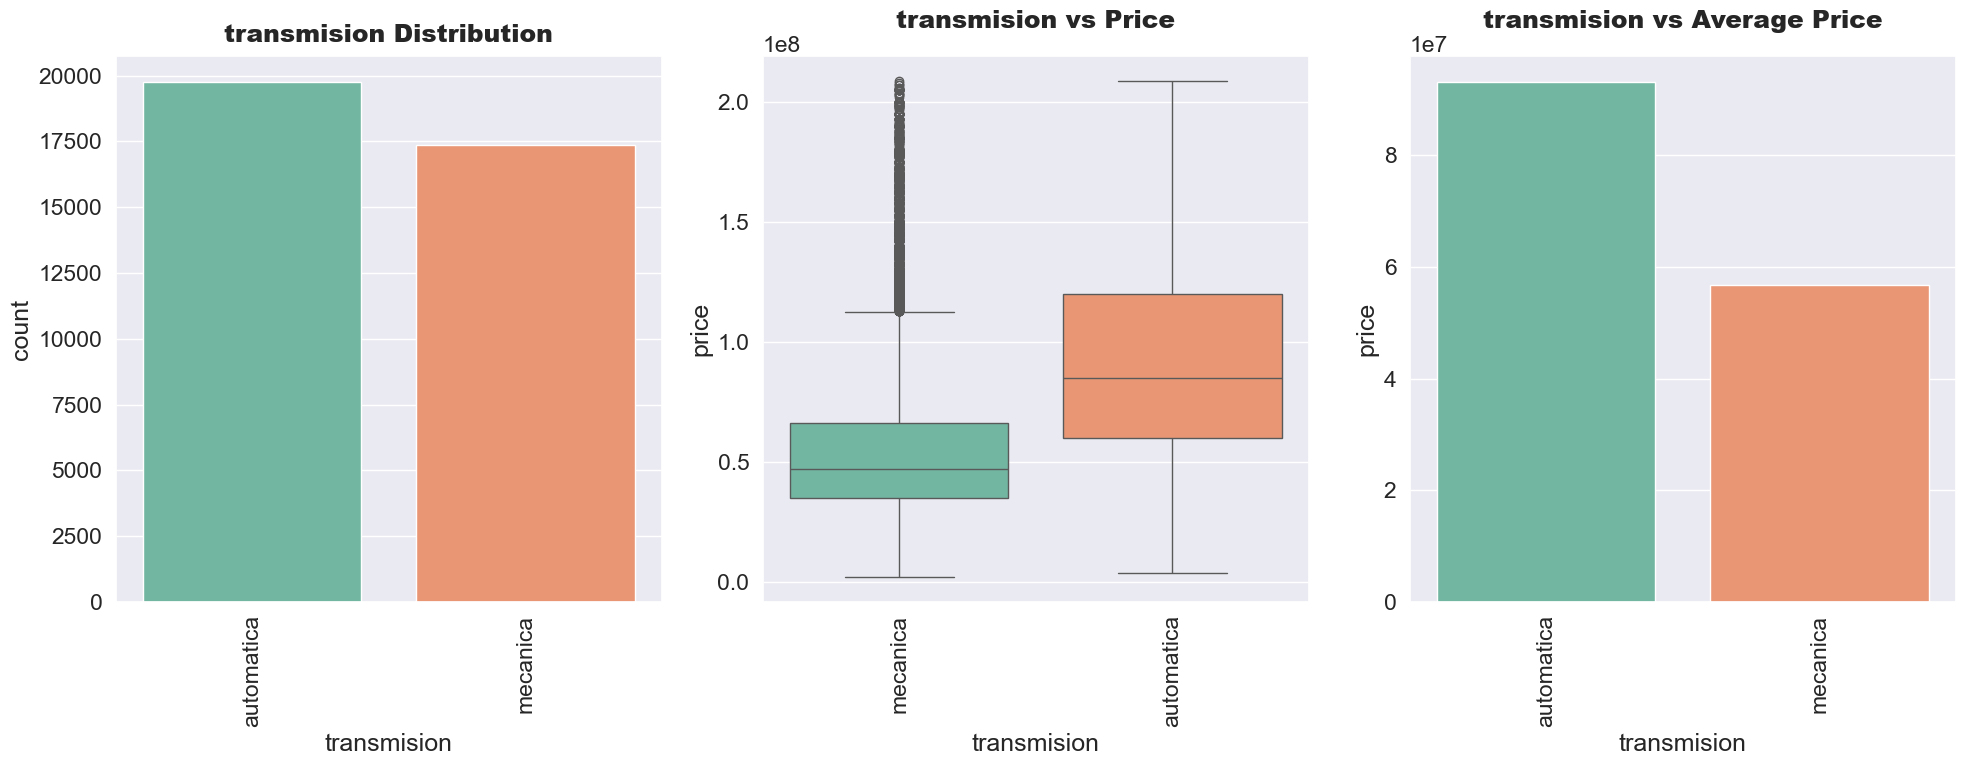

In [283]:
categorical_visualization("transmision")

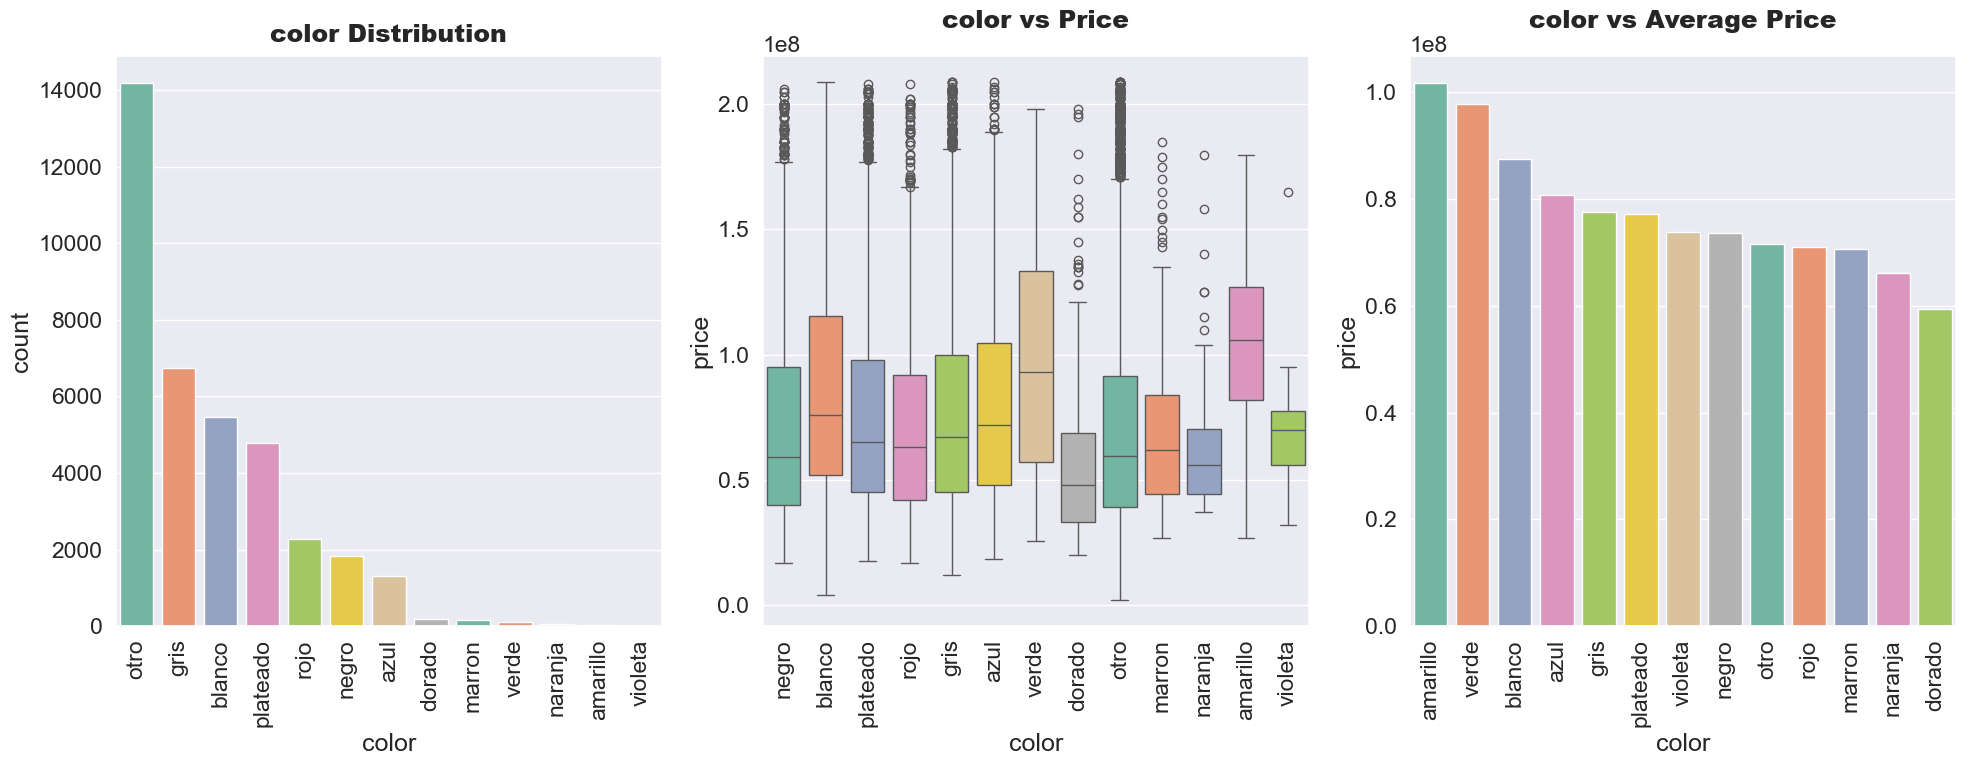

In [286]:
categorical_visualization("color")

## Variables numéricas

In [285]:
df.columns

Index(['id_car', 'title', 'link', 'price', 'city', 'color',
       'aire_acondicionado', 'marca', 'puertas', 'motor',
       'tipo_de_combustible', 'kilometros', 'modelo', 'version', 'potencia',
       'control_de_traccion', 'transmision', 'age'],
      dtype='object')

In [293]:
df[df['modelo'].str.contains('duster')].shape

(1182, 18)

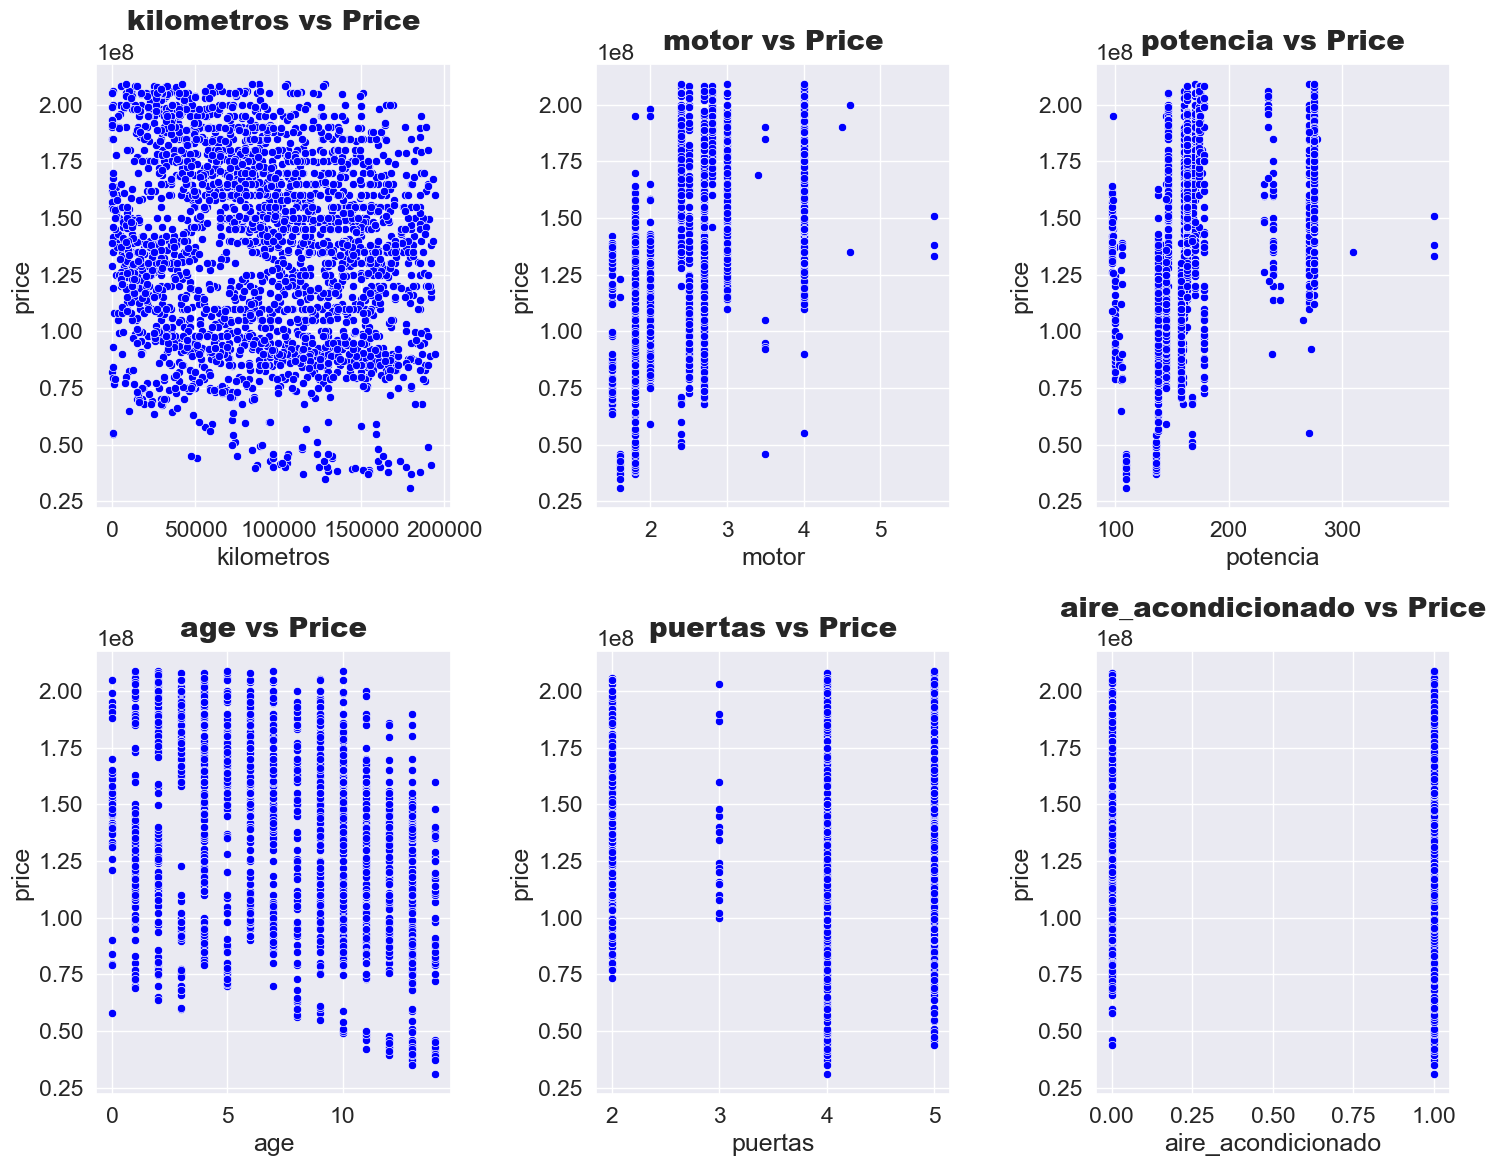

In [304]:
scatter_plot(["kilometros","motor","potencia", "age", "puertas", "aire_acondicionado"], filter='marca', value='toyota')

La verdad es que no se ve que las variables esten muy correlacionadas entre si, sin embargo cuando se realiza el análisis por el modelo de duster, si se encuentra una correlación importante con las variables de kilometros y de age

## Sección 3. Modelado

### Ampliar caracteristicas

In [321]:
# Crea categoria de gama baja media o alta segun el promedio del valor de cada modelo
z = round(df.groupby(["modelo"])["price"].agg(["mean"]),2).T
df = df.merge(z.T,how="left",on="modelo")
df.rename(columns={"mean":"modelo_mean"},inplace=True)

bins = [0,70000000,120000000,400000000]
cars_bin=['Gama Baja','Gama Media','Gama Alta']
df['cars_range'] = pd.cut(df['modelo_mean'],bins,right=False,labels=cars_bin)
df.head()

,id_car,title,link,price,city,color,aire_acondicionado,marca,puertas,motor,tipo_de_combustible,kilometros,modelo,version,potencia,control_de_traccion,transmision,age,modelo_mean,cars_range
0,MCO2391186016,Jeep Compass 2.4 Limited,https://carro.mercadolibre.com.co/MCO-23911860...,37990000,bogota dc,negro,1,jeep,5,2.4,gasolina,182000.0,compass,2.4 Limited,172.0,4x4,mecanica,14,74942467.39,Gama Media
1,MCO2391197332,Mazda 2 1.5 2010,https://carro.mercadolibre.com.co/MCO-23911973...,32000000,bogota dc,blanco,1,mazda,5,1.5,gasolina,146330.0,2,1.5,NaN,<NA>,automatica,14,58190767.63,Gama Baja
2,MCO1426750375,Mazda 3 Lxha7 At 2.0 2010,https://carro.mercadolibre.com.co/MCO-14267503...,30500000,bogota dc,plateado,1,mazda,4,2.0,gasolina,106000.0,3,2.0 Lxhm7,145.0,delantera,automatica,14,68059441.57,Gama Baja
3,MCO1426711773,Renault Kangoo F76 1.6 2010,https://carro.mercadolibre.com.co/MCO-14267117...,24500000,bogota dc,blanco,1,renault,4,1.6,gasolina,170500.0,kangoo,1.6 Express 4 p,95.0,delantera,mecanica,14,39679432.22,Gama Baja
4,MCO1425593285,Hyundai Tucson,https://carro.mercadolibre.com.co/MCO-14255932...,43000000,bogota dc,plateado,1,hyundai,5,2.0,gasolina,110050.0,tucson,Gl,NaN,4x2,mecanica,14,85335179.01,Gama Media


In [322]:
df.columns

Index(['id_car', 'title', 'link', 'price', 'city', 'color',
       'aire_acondicionado', 'marca', 'puertas', 'motor',
       'tipo_de_combustible', 'kilometros', 'modelo', 'version', 'potencia',
       'control_de_traccion', 'transmision', 'age', 'modelo_mean',
       'cars_range'],
      dtype='object')

In [346]:
# Create new dataframe with selected columns and one hot encoding
df_new = df[[ 'price', 'aire_acondicionado', 'marca', 'motor','tipo_de_combustible',\
        'kilometros', 'potencia','control_de_traccion', 'transmision', 'age', 'cars_range']]
print(f'=== df new shape: {df_new.shape} === {list(df_new.columns)}')


variables_to_encode = ['marca','tipo_de_combustible','control_de_traccion', 'transmision', 'cars_range']
df_new = pd.get_dummies(df_new, columns=variables_to_encode)
print(f'=== df new shape: {df_new.shape} === {list(df_new.columns)}')

=== df new shape: (37105, 11) === ['price', 'aire_acondicionado', 'marca', 'motor', 'tipo_de_combustible', 'kilometros', 'potencia', 'control_de_traccion', 'transmision', 'age', 'cars_range']
=== df new shape: (37105, 40) === ['price', 'aire_acondicionado', 'motor', 'kilometros', 'potencia', 'age', 'marca_audi', 'marca_bmw', 'marca_chevrolet', 'marca_dodge', 'marca_ford', 'marca_honda', 'marca_hyundai', 'marca_jeep', 'marca_kia', 'marca_mazda', 'marca_mercedes_benz', 'marca_mini', 'marca_mitsubishi', 'marca_nissan', 'marca_peugeot', 'marca_renault', 'marca_suzuki', 'marca_toyota', 'marca_volkswagen', 'marca_volvo', 'tipo_de_combustible_diesel', 'tipo_de_combustible_electrico', 'tipo_de_combustible_gasolina', 'tipo_de_combustible_gasolina y gas', 'tipo_de_combustible_hibrido', 'control_de_traccion_4x2', 'control_de_traccion_4x4', 'control_de_traccion_delantera', 'control_de_traccion_trasera', 'transmision_automatica', 'transmision_mecanica', 'cars_range_Gama Baja', 'cars_range_Gama Medi

In [347]:
# Escalado de las variables
scaler = StandardScaler()
num_cols = ['kilometros', 'potencia', 'age', 'motor']
df_new[num_cols] = scaler.fit_transform(df_new[num_cols])
# imputar valores faltantes con la mediana
df_new[num_cols] = df_new[num_cols].fillna(df_new[num_cols].median())
df_new.head()

,price,aire_acondicionado,motor,kilometros,potencia,age,marca_audi,marca_bmw,marca_chevrolet,marca_dodge,marca_ford,marca_honda,marca_hyundai,marca_jeep,marca_kia,marca_mazda,marca_mercedes_benz,marca_mini,marca_mitsubishi,marca_nissan,marca_peugeot,marca_renault,marca_suzuki,marca_toyota,marca_volkswagen,marca_volvo,tipo_de_combustible_diesel,tipo_de_combustible_electrico,tipo_de_combustible_gasolina,tipo_de_combustible_gasolina y gas,tipo_de_combustible_hibrido,control_de_traccion_4x2,control_de_traccion_4x4,control_de_traccion_delantera,control_de_traccion_trasera,transmision_automatica,transmision_mecanica,cars_range_Gama Baja,cars_range_Gama Media,cars_range_Gama Alta
0,37990000,1,0.631959,2.676820,0.309915,1.956448,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False
1,32000000,1,-0.731165,1.823295,-0.161048,1.956448,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False
2,30500000,1,0.026126,0.858264,-0.128568,1.956448,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,True,False,False
3,24500000,1,-0.579706,2.401644,-0.940572,1.956448,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False
4,43000000,1,0.026126,0.955174,-0.161048,1.956448,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False


In [348]:
# Seleccionar variables predictoras y target
x = df_new.drop(columns=["price"])
y = df_new["price"]

# dividir en pruebas y validación
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

training_score = []
testing_score = []

def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)



x_train - >   (29684, 39)
x_test - >   (7421, 39)
y_train - >   (29684,)
y_test - >   (7421,)


In [349]:
model_prediction(LinearRegression())
model_prediction(DecisionTreeRegressor())
model_prediction(RandomForestRegressor())
model_prediction(AdaBoostRegressor())
model_prediction(LGBMRegressor())
model_prediction(XGBRegressor())
model_prediction(CatBoostRegressor())
model_prediction(GradientBoostingRegressor())


r2_Score of LinearRegression() model on Training Data is: 84.70334669980437
r2_Score of LinearRegression() model on Testing Data is: 84.1134574401199
r2_Score of DecisionTreeRegressor() model on Training Data is: 99.88593490177473
r2_Score of DecisionTreeRegressor() model on Testing Data is: 90.29876944666147
r2_Score of RandomForestRegressor() model on Training Data is: 99.11080112355482
r2_Score of RandomForestRegressor() model on Testing Data is: 94.05193731213703
r2_Score of AdaBoostRegressor() model on Training Data is: 75.34061772430746
r2_Score of AdaBoostRegressor() model on Testing Data is: 74.27886500759375
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 572
[LightGBM] [Info] Number of data poi

In [352]:
models = ["Linear Regression","Decision Tree","Random Forest","Ada Boost","LGBM","XGBoost","CatBoost","Gradient Boosting"]
df_results = pd.DataFrame({"Algorithms":models,
                    "Training Score":training_score,
                    "Testing Score":testing_score})
df_results

,Algorithms,Training Score,Testing Score
0,Linear Regression,84.703347,84.113457
1,Decision Tree,99.885935,90.298769
2,Random Forest,99.110801,94.051937
3,Ada Boost,75.340618,74.278865
4,LGBM,94.542879,93.802448
5,XGBoost,96.422050,94.494212
6,CatBoost,95.795317,94.633103
7,Gradient Boosting,90.682575,90.120087


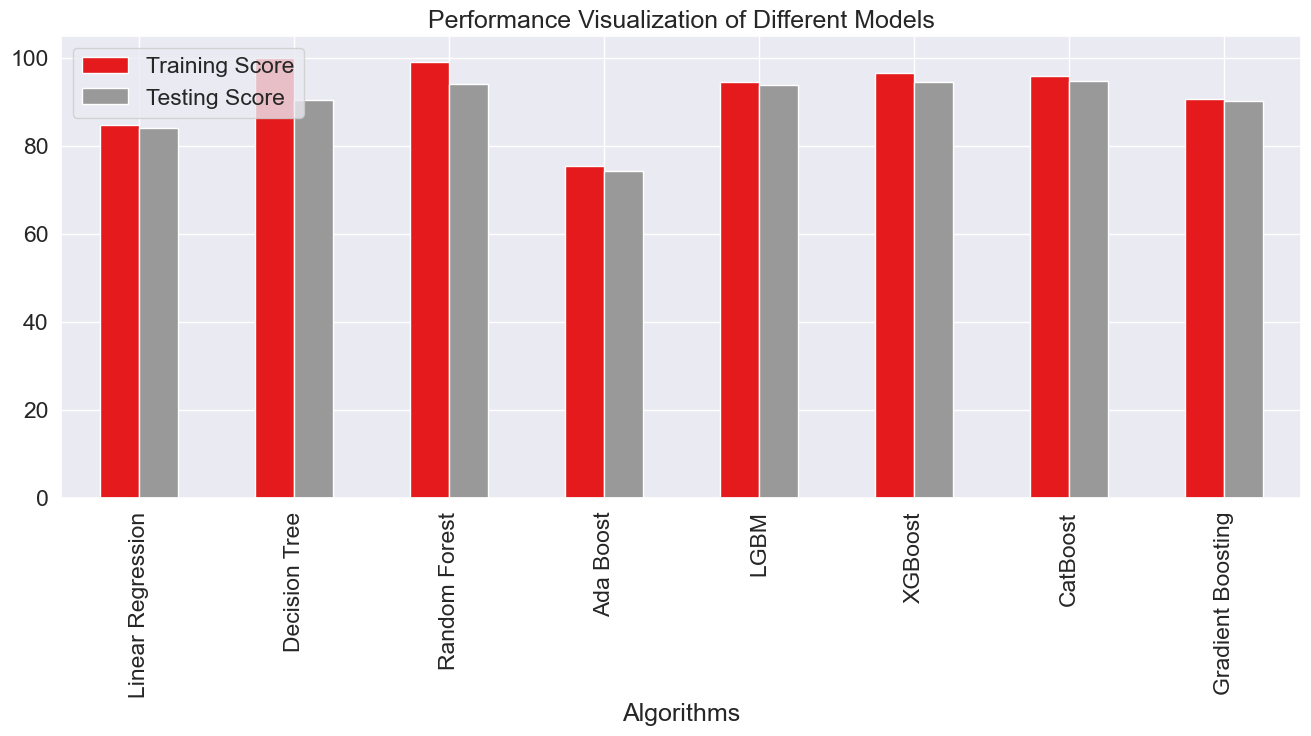

In [353]:
df_results.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

## Sección 4. Validación